<a href="https://colab.research.google.com/github/GuyvDev/DL-HW-Private/blob/main/ece046211_hw1_optimization_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> ECE 046211 - Technion - Deep Learning
---

## HW1 - Optimization and Automatic Differentiation
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**.
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ece046211_hw1_id1_id2.ipynb`.
    * If you answered the questionss in a different file you should submit a `.zip` file with the name `ece046211_hw1_id1_id2.zip` with content:
        * `ece046211_hw1_id1_id2.ipynb` - the code tasks
        * `ece046211_hw1_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/download">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw1` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Convergence of Gradient Descent](#-Question-1---Convergence-of-Gradient-Descent)
    * [Q2 - Optimization and Gradient Descent](#-Question-2---Optimization-and-Gradient-Descent)
    * [Q3 - Efficient Differentiation](#-Question-3---Efficient-Differentiation)
    * [Q4 - Autodiff](#-Question-4----Automatic-Differentiation)
    * [Q5 - Autodiff 2](#-Question-5----Automatic-Differentiation-2)
* [Part 2 - Code Assignments](#-Part-2---Code-Assignments)
    * [Task 1 - The Beale Function](#-Task-1---The-Beale-Function)
    * [Task 2 - Building an Optimizer - Adam](#-Task-2---Building-an-Optimizer---Adam)
    * [Task 3 - PyTorch Autograd](#-Task-3---PyTorch-Autograd)
    * [Task 4 - Low Rank Matrix Factorization](#-Task-4---Low-Rank-Matrix-Factorization)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 - Convergence of Gradient Descent
---
Recall from the lecture notes:

* **Definition**: A function $f$ is $\beta$-smooth if: $$ \forall w_1, w_2 \in \mathbb{R}^d: ||\nabla f(w_1) - \nabla f(w_2)|| \leq \beta ||w_1 -w_2|| $$
* **Lemma**: If $f$ is $\beta$-smooth then $$ f(w_1) -f(w_2) -\nabla f(w_2)^T (w_1-w_2) \leq \frac{\beta}{2} ||w_1-w_2||^2 $$

Prove the lemma.

Hints:
* Represent $f$ as an integral: $f(x) − f(y) = \int_0^1 \nabla f(y + t(x-y))^T(x-y) dt $
* Make use of Cauchy-Schwarz.


# Question 1 - Answer
---

**Proof:**

By the definition of a $\beta$-smooth function, we know:
$$ \|\nabla f(w_1) - \nabla f(w_2)\| \leq \beta \|w_1 - w_2\| $$
This implies that the gradient of $f$ does not change too rapidly.

Represent $f(w_1) - f(w_2)$ as an integral:
$$ f(w_1) - f(w_2) = \int_0^1 \nabla f(w_2 + t(w_1 - w_2))^T(w_1 - w_2) dt $$

Subtract $\nabla f(w_2)^T(w_1 - w_2)$ from both sides. Note that

 $\nabla f(w_2)^T(w_1 - w_2) = \int_0^1 \nabla f(w_2)^T(w_1 - w_2) dt$  -->
$$ f(w_1) - f(w_2) - \nabla f(w_2)^T(w_1 - w_2) = \int_0^1 [\nabla f(w_2 + t(w_1 - w_2)) - \nabla f(w_2)]^T(w_1 - w_2) dt $$

Apply the Cauchy-Schwarz inequality ($a^T b \leq \|a\| \|b\|$) to the integrand:
$$ [\nabla f(w_2 + t(w_1 - w_2)) - \nabla f(w_2)]^T(w_1 - w_2) \leq \|\nabla f(w_2 + t(w_1 - w_2)) - \nabla f(w_2)\| \cdot \|w_1 - w_2\| $$

Using the $\beta$-smoothness property **on the first norm term**:
$$ \|\nabla f(w_2 + t(w_1 - w_2)) - \nabla f(w_2)\| \leq \beta \|(w_2 + t(w_1 - w_2)) - w_2\| = \beta \|t(w_1 - w_2)\| = \beta |t| \|w_1 - w_2\| $$
Since $t \in [0, 1]$, $|t| = t$. So the inequality becomes:
$$ [\nabla f(w_2 + t(w_1 - w_2)) - \nabla f(w_2)]^T(w_1 - w_2) \leq (\beta t \|w_1 - w_2\|) \cdot \|w_1 - w_2\| = \beta t \|w_1 - w_2\|^2 $$

Substitute this back into the integral:
$$ f(w_1) - f(w_2) - \nabla f(w_2)^T(w_1 - w_2) \leq \int_0^1 \beta t \|w_1 - w_2\|^2 dt $$
$$ f(w_1) - f(w_2) - \nabla f(w_2)^T(w_1 - w_2) \leq \beta \|w_1 - w_2\|^2 \int_0^1 t dt $$

Evaluate the integral:
$$ \int_0^1 t dt = \left[ \frac{t^2}{2} \right]_0^1 = \frac{1}{2} $$

Final result:
$$ f(w_1) - f(w_2) - \nabla f(w_2)^T(w_1 - w_2) \leq \frac{\beta}{2} \|w_1 - w_2\|^2 \quad $$



## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - Optimization and Gradient Descent
---
The function $f: \mathbb{R}^d \to \mathbb{R}$ is infinitely continuously differentiable, and satisfies $\min_{w \in \mathbb{R}^d} f(w)=f_{*}> -\infty$.

We wish to minimize this function using a version of Gradient Descent (GD) with step-size $\eta$, where in each iteration the gradients are multiplied by matrix $A$ $$ (*)\: w(t+1) = w(t) -\eta A\nabla f\left(w(t) \right).$$

Matrix $A$ is symmetric and strictly positive (positive definite with strictly positive eigenvalues), i.e., $\lambda_{min} \triangleq \lambda_{min}(A) >0$, and denote $\lambda_{max} \triangleq \lambda_{max}(A)$.

1. In section only assume that $f(w)=\frac{1}{2}w^THw$, where $H$ is symmetric and strictly positive (positive definite with strictly positive eigenvalues). Find/choose $A$ and $\eta$ such that the algorithm $(*)$ converges in minimal number of steps. Why is that choice is infeasible when $d$ is large? What is a common applicable approximation?
2. Prove that Gradient Flow (i.e., GD in the limit $\eta \to 0$): $$ \dot{w}(t)=-A\nabla f \left(w(t ) \right) $$ converges to a critical point for all $f$ and $A$ that satisfy the conditions in the given question.
    * **Hint**: from the properties of eigenvalues it satifies that $\forall v\in\mathbb{R}^d: \lambda_{min}||v||^2\leq v^TAv\leq \lambda_{max}||v||^2$.
3. Given that the function $f$ is $\beta \text{-smooth}$, find a condition on the step-size $\eta$ such that we get convergence to a critical point in algorithm $(*)$. Prove convergence under this condition.
    * **Hint**: for a $\beta \text{-smooth}$ function, one can write: $$ f\left(w(t+1)\right) -  f\left(w(t)\right) \leq \left(w(t+1) -w(t) \right)^T\nabla f\left(w(t)\right) + \frac{\beta}{2} ||w(t+1) -w(t) ||^2$$

---
# **Question 2: Answer**
---
**Part 1: Optimal A and η for Quadratic Functions**

For $f(w) = \frac{1}{2} w^T H w$, where $H$ is symmetric and positive definite, the gradient is $\nabla f(w) = Hw$.

The update rule is:
$$ w^{(t+1)} = w^{(t)} - \eta A \nabla f(w^{(t)}) = w^{(t)} - \eta A H w^{(t)} $$
To achieve convergence in the minimal number of steps (ideally one step), we want the update to directly reach the minimum (which is at $w=0$ for this function). If we choose $A = H^{-1}$ (which exists since $H$ is positive definite), the update becomes:
$$ w^{(t+1)} = w^{(t)} - \eta H^{-1} H w^{(t)} = w^{(t)} - \eta I w^{(t)} = (1 - \eta) w^{(t)} $$
Setting the step size $\eta = 1$ makes $w^{(t+1)} = (1 - 1) w^{(t)} = 0$. Thus, with $A = H^{-1}$ and $\eta = 1$, the algorithm converges in exactly one step from any starting point $w^{(0)}$.

However, computing the inverse $H^{-1}$ has a time complexity of $O(d^3)$, which is infeasible when the dimension $d$ is large. A common applicable approximation is to use a diagonal matrix for $A$, such as $A = \text{diag}(1/h_{ii})$, where $h_{ii}$ are the diagonal elements of $H$. This approximates $H^{-1}$ while being much cheaper to compute ($O(d)$).

**Part 2: Gradient Flow Convergence**

Gradient flow is defined by the differential equation: $\dot{w}(t) = -A \nabla f(w(t))$.
Consider the Lyapunov function $V(w) = f(w)$. Assuming $f$ is bounded below by $f^*$, we can analyze $V(w(t)) = f(w(t))$. The time derivative is:
$$ \frac{d V(w(t))}{dt} = \frac{d f(w(t))}{dt} = \nabla f(w(t))^T \dot{w}(t) $$
Substituting the gradient flow equation:
$$ \frac{d V(w(t))}{dt} = \nabla f(w(t))^T (-A \nabla f(w(t))) = - \nabla f(w(t))^T A \nabla f(w(t)) $$
Since $A$ is symmetric and positive definite, we have $\nabla f(w)^T A \nabla f(w) \geq \lambda_{\min}(A) \|\nabla f(w)\|^2$, where $\lambda_{\min}(A) > 0$. Thus:
$$ \frac{d V(w(t))}{dt} \leq -\lambda_{\min}(A) \|\nabla f(w)\|^2 $$
Since $\lambda_{\min}(A) > 0$, $dV/dt \leq 0$. Equality ($dV/dt = 0$) holds if and only if $\|\nabla f(w)\|^2 = 0$, which means $\nabla f(w) = 0$. This shows that the function value $f(w(t))$ is non-increasing along the trajectory. By Lyapunov's direct method, the system converges to the largest invariant set where $dV/dt = 0$, which is the set of critical points where $\nabla f(w) = 0$.

**Part 3: Step Size Condition for Convergence**

From the descent lemma for $\beta$-smooth functions:
$$ f(w^{(t+1)}) - f(w^{(t)}) \leq \nabla f(w^{(t)})^T (w^{(t+1)} - w^{(t)}) + \frac{\beta}{2} \|w^{(t+1)} - w^{(t)}\|^2 $$
Substitute the update step $w^{(t+1)} - w^{(t)} = -\eta A \nabla f(w^{(t)})$:
$$ f(w^{(t+1)}) - f(w^{(t)}) \leq \nabla f(w^{(t)})^T (-\eta A \nabla f(w^{(t)})) + \frac{\beta}{2} \|-\eta A \nabla f(w^{(t)})\|^2 $$
$$ f(w^{(t+1)}) - f(w^{(t)}) \leq -\eta \nabla f(w^{(t)})^T A \nabla f(w^{(t)}) + \frac{\beta \eta^2}{2} \|A \nabla f(w^{(t)})\|^2 $$
Use the properties of symmetric positive definite matrix $A$:
$$ \nabla f(w^{(t)})^T A \nabla f(w^{(t)}) \geq \lambda_{\min}(A) \|\nabla f(w^{(t)})\|^2 $$
$$ \|A \nabla f(w^{(t)})\|^2 = \nabla f(w^{(t)})^T A^T A \nabla f(w^{(t)}) = \nabla f(w^{(t)})^T A^2 \nabla f(w^{(t)}) \leq \lambda_{\max}(A^2) \|\nabla f(w^{(t)})\|^2 = (\lambda_{\max}(A))^2 \|\nabla f(w^{(t)})\|^2 $$
Substituting these bounds into the inequality for $f(w^{(t+1)}) - f(w^{(t)})$:
$$ f(w^{(t+1)}) - f(w^{(t)}) \leq -\eta \lambda_{\min}(A) \|\nabla f(w^{(t)})\|^2 + \frac{\beta \eta^2 (\lambda_{\max}(A))^2}{2} \|\nabla f(w^{(t)})\|^2 $$
$$ f(w^{(t+1)}) - f(w^{(t)}) \leq \left( -\eta \lambda_{\min}(A) + \frac{\beta \eta^2 (\lambda_{\max}(A))^2}{2} \right) \|\nabla f(w^{(t)})\|^2 $$
For convergence, we require the function value to decrease when the gradient is non-zero. This means the term in the parenthesis must be strictly negative:
$$ -\eta \lambda_{\min}(A) + \frac{\beta \eta^2 (\lambda_{\max}(A))^2}{2} < 0 $$
Assuming $\eta > 0$, we can divide by $\eta$:
$$ - \lambda_{\min}(A) + \frac{\beta \eta (\lambda_{\max}(A))^2}{2} < 0 $$
$$ \frac{\beta \eta (\lambda_{\max}(A))^2}{2} < \lambda_{\min}(A) $$
$$ \eta < \frac{2 \lambda_{\min}(A)}{\beta (\lambda_{\max}(A))^2} $$
This is the condition on the step-size $\eta$ that guarantees a decrease in the function value at each step (unless already at a critical point), leading to convergence to a critical point.

---

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 - Efficient Differentiation
---
We wish to optimize a loss function $\mathcal{L}\left(\mathbf{w}\right)$ for  $\mathbf{w}\in\mathbb{R}^{d}$ using Gradient Descent (GD) with some step size schedule $\eta_{t}$
\begin{equation}
(1)\:\: \forall t=1,2,..:\mathbf{w}\left(t\right)=\mathbf{w}\left(t-1\right)-\eta_{t}\nabla\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)
\end{equation}
initialized from some $\mathbf{w}\left(0\right)$.
We would like to learn the best step size schedule using GD. **Hint**: throughout this question, you should use the *chain rule*.

1. Suppose we can consider each $\eta_{t}$ as a separate parameter for each $t$. We initialize this parameter with $\eta_{0}$ and update $\eta_{t-1}$ with a GD step on $\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)$
\begin{equation}
(2)\:\:\eta_{t}=\eta_{t-1}-\alpha_{t}\frac{\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)}{\partial\eta_{t-1}}
\end{equation} for every step of eq. $(1)$, where $\alpha_{t}$ is the another step size. Calculate $\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)/\partial\eta_{t-1}$ as a function of the loss gradients $\nabla\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)$ and $\nabla\mathcal{L}\left(\mathbf{w}\left(t-2\right)\right)$.
2. Now suppose we want to similarly update $\alpha_{t-1}$ using GD step on $\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)$ every step of eq. $(2)$ with update step $\kappa_{t}$
\begin{equation}
\alpha_{t}=\alpha_{t-1}-\kappa_{t}\frac{\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)}{\partial\alpha_{t-1}}\,.
\end{equation} Calculate $\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)/\partial\alpha_{t-1}$ as a function of $\left\{ \nabla\mathcal{L}\left(\mathbf{w}\left(t-k\right)\right)\right\} _{k=1}^{3}$.
3. Now we wish to update $\left(\eta_{t-1},\eta_{t-2}\right)$ by doing a GD step on $\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)$
\begin{equation}
(3)\:\:\left(\eta_{t+1},\eta_{t}\right)=\left(\eta_{t-1},\eta_{t-2}\right)-\alpha_{t}\left(\frac{\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)}{\partial\eta_{t-1}},\frac{\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)}{\partial\eta_{t-2}}\right)
\end{equation} every two steps of eq. $(1)$. Calculate the derivative $\frac{\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)}{\partial\eta_{t-2}}$  as a function of $\eta_{t-1}$, $\left\{ \nabla\mathcal{L}\left(\mathbf{w}\left(t-k\right)\right)\right\} _{k=1}^{3}$, and $\nabla^{2}\mathcal{L}\left(\mathbf{w}\left(t-2\right)\right)$.
4. Now we wish again to update $\left(\eta_{t},\eta_{t+1},...,\eta_{t+T}\right)$ by doing a GD step on $\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)$ every $T$ steps of eq. $(1)$
\begin{equation}
(4)\:\:\left(\eta_{t+T},...,\eta_{t}\right)=\left(\eta_{t-1},...,\eta_{t-1-T}\right)-\alpha_{t}\left(\frac{\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)}{\partial\eta_{t-1}},...,\frac{\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)}{\partial\eta_{t-1-T}}\right)
\end{equation} Calculate the derivative $\frac{\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)}{\partial\eta_{t-\tau}}$ as a function of $\left\{ \eta_{t-k},\nabla^{2}\mathcal{L}\left(\mathbf{w}\left(t-k-1\right)\right)\right\} _{k=1}^{\tau-1}$, $\nabla\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)$ and $\nabla\mathcal{L}\left(\mathbf{w}\left(t-\tau-1\right)\right)$.
5. Compare this approach (eq. $(4)$ with $T>1$) to the first one (eq. $(2)$). Name one advantage for each approach.
 Hints: Think of computional complexity, ease of optimization, suitability
 of the objective.

---

# **Question 3: Answer**

---
**Part 1: Derivative of $L(w^{(t-1)})$ w.r.t. $\eta_{t-1}$**

We have:

$$
\mathbf{w}(t-1) = \mathbf{w}(t-2) - \eta_{t-1} \nabla \mathcal{L}(\mathbf{w}(t-2))
$$

Applying the chain rule:

$$
\frac{\partial \mathcal{L}(\mathbf{w}(t-1))}{\partial \eta_{t-1}} = \nabla \mathcal{L}(\mathbf{w}(t-1))^T \cdot \frac{\partial \mathbf{w}(t-1)}{\partial \eta_{t-1}}
$$

Since:

$$
\frac{\partial \mathbf{w}(t-1)}{\partial \eta_{t-1}} = -\nabla \mathcal{L}(\mathbf{w}(t-2))
$$

(treating $ \mathbf{w}(t-2) $ as constant $ w.r.t. \eta_{t-1} $ ), we get:

$$
\frac{\partial \mathcal{L}(\mathbf{w}(t-1))}{\partial \eta_{t-1}} = -\nabla \mathcal{L}(\mathbf{w}(t-1))^T \nabla \mathcal{L}(\mathbf{w}(t-2))
$$

**Part 2: Derivative of $L(w^{(t-1)})$ w.r.t. $\alpha_{t-1}$**


We are given the learning rate update:

$$
\eta_{t-1} = \eta_{t-2} - \alpha_{t-1} \cdot \frac{\partial \mathcal{L}(\mathbf{w}(t-2))}{\partial \eta_{t-2}}
$$

And the gradient descent update:

$$
\mathbf{w}(t-1) = \mathbf{w}(t-2) - \eta_{t-1} \nabla \mathcal{L}(\mathbf{w}(t-2))
$$

We are asked to compute:

$$
\frac{\partial \mathcal{L}(\mathbf{w}(t-1))}{\partial \alpha_{t-1}}
$$

Using the **chain rule**:

$$
\frac{\partial \mathcal{L}(\mathbf{w}(t-1))}{\partial \alpha_{t-1}} =
\nabla \mathcal{L}(\mathbf{w}(t-1))^T \cdot \frac{\partial \mathbf{w}(t-1)}{\partial \eta_{t-1}} \cdot \frac{\partial \eta_{t-1}}{\partial \alpha_{t-1}}
$$

We compute:

- From the update:
  $$
  \frac{\partial \mathbf{w}(t-1)}{\partial \eta_{t-1}} = -\nabla \mathcal{L}(\mathbf{w}(t-2))
  $$

- From the previous learning rate step:
  $$
  \frac{\partial \eta_{t-1}}{\partial \alpha_{t-1}} =
  \nabla \mathcal{L}(\mathbf{w}(t-2))^T \nabla \mathcal{L}(\mathbf{w}(t-3))
  $$

Putting it all together:

$$
\frac{\partial \mathcal{L}(\mathbf{w}(t-1))}{\partial \alpha_{t-1}} =
- \nabla \mathcal{L}(\mathbf{w}(t-1))^T \nabla \mathcal{L}(\mathbf{w}(t-2)) \cdot
\nabla \mathcal{L}(\mathbf{w}(t-2))^T \nabla \mathcal{L}(\mathbf{w}(t-3))
$$


**Part 3: Derivative of $L(w^{(t-1)})$ w.r.t. $\eta_{t-2}$**



We are given two consecutive GD updates:

$$
\mathbf{w}(t-2) = \mathbf{w}(t-3) - \eta_{t-2} \nabla \mathcal{L}(\mathbf{w}(t-3))
$$

$$
\mathbf{w}(t-1) = \mathbf{w}(t-2) - \eta_{t-1} \nabla \mathcal{L}(\mathbf{w}(t-2))
$$

We are asked to compute:

$$
\frac{\partial \mathcal{L}(\mathbf{w}(t-1))}{\partial \eta_{t-2}}
$$

Apply the chain rule:

$$
\frac{\partial \mathcal{L}(\mathbf{w}(t-1))}{\partial \eta_{t-2}} =
\nabla \mathcal{L}(\mathbf{w}(t-1))^T \cdot
\frac{\partial \mathbf{w}(t-1)}{\partial \mathbf{w}(t-2)} \cdot
\frac{\partial \mathbf{w}(t-2)}{\partial \eta_{t-2}}
$$

Now compute each term:

- From the update:
  $$
  \frac{\partial \mathbf{w}(t-2)}{\partial \eta_{t-2}} = -\nabla \mathcal{L}(\mathbf{w}(t-3))
  $$

- The Jacobian of $ \mathbf{w}(t-1) $ w.r.t. $ \mathbf{w}(t-2) $, using first-order Taylor approximation:
  $$
  \frac{\partial \mathbf{w}(t-1)}{\partial \mathbf{w}(t-2)} =
  I - \eta_{t-1} \nabla^2 \mathcal{L}(\mathbf{w}(t-2))
  $$


$$
\frac{\partial \mathcal{L}(\mathbf{w}(t-1))}{\partial \eta_{t-2}} =
- \nabla \mathcal{L}(\mathbf{w}(t-1))^T \cdot
\left[
I - \eta_{t-1} \nabla^2 \mathcal{L}(\mathbf{w}(t-2))
\right] \cdot
\nabla \mathcal{L}(\mathbf{w}(t-3))
$$


**Part 4: Derivative of $L(w^{(t-1)})$ w.r.t. $\eta_{t-\tau}$**


We are asked to compute:

$$
\frac{\partial \mathcal{L}(\mathbf{w}(t-1))}{\partial \eta_{t - \tau}}
$$

Each gradient descent step is given by:

$$
\mathbf{w}(s) = \mathbf{w}(s-1) - \eta_s \cdot \nabla \mathcal{L}(\mathbf{w}(s-1))
$$

So $ \eta_{t - \tau} $ influences $ \mathbf{w}(t - \tau) $, which affects $ \mathbf{w}(t - \tau + 1) $, and so on until
 $ \mathbf{w}(t-1) $, where the loss is computed.

We apply the chain rule through these steps:

$$
\frac{\partial \mathcal{L}(\mathbf{w}(t-1))}{\partial \eta_{t - \tau}} =
\nabla \mathcal{L}(\mathbf{w}(t-1))^T \cdot
\left( \prod_{k=1}^{\tau - 1} \left[ I - \eta_{t - k} \cdot \nabla^2 \mathcal{L}(\mathbf{w}(t - k - 1)) \right] \right)
\cdot \left( -\nabla \mathcal{L}(\mathbf{w}(t - \tau - 1)) \right)
$$

Explanation of terms:
- The final gradient is with respect to \(\mathbf{w}(t-1)\)
- The product of Jacobians represents the effect of each intermediate GD step
- The final term is the effect of $ \eta_{t - \tau} $ on $ \mathbf{w}(t - \tau) $i*

Final result:

$$
\frac{\partial \mathcal{L}(\mathbf{w}(t-1))}{\partial \eta_{t - \tau}} =
- \nabla \mathcal{L}(\mathbf{w}(t-1))^T \cdot
\left( \prod_{k=1}^{\tau-1} \left[ I - \eta_{t - k} \cdot \nabla^2 \mathcal{L}(\mathbf{w}(t - k - 1)) \right] \right)
\cdot \nabla \mathcal{L}(\mathbf{w}(t - \tau - 1))
$$


**Part 5: Comparison of Approaches**

*   **Eq. (2) (Single-Step Update):**
    *   *Advantage:* Simpler to compute and implement. Requires only first-order gradients ($\nabla L$). Lower computational cost per update.
    *   *Disadvantage:* Myopic. Only considers the immediate impact of the previous step size, potentially missing longer-term optimization dynamics or interactions between step sizes over time.
*   **Eq. (4) (Multi-Step Update, T>1):**
    *   *Advantage:* Captures longer-term dependencies and interactions between step sizes over a window of $T$ steps. Potentially leads to a better overall schedule by considering more history.
    *   *Disadvantage:* Computationally much more expensive. Requires computing and storing/backpropagating through Hessians ($\nabla^2 L$), leading to significantly higher memory and computation cost per update, especially for large $d$. Optimization landscape for multiple $\eta$ values can be complex.

---

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 4 -  Automatic Differentiation
---

Consider the scalar function: $$ f = \exp(\exp(x) + \exp(x)^2) +\sin(\exp(x) + \exp(x)^2) $$

1. Write down the derivative w.r.t. $x$ explicitly, i.e., $\frac{d f}{d x}$
2. We define the following intermediate variables: $$ a = \exp(x) $$ $$ b=a^2 $$ $$ c = a+b $$ $$ d=\exp(c) $$ $$ e=\sin(c) $$ $$ f=d+e $$ Draw a graph picturing the relationship between all variables (called the **computation graph**).
3. Using the graph, write down the derivatives of the individual terms, working backwards to compute the derivative of $f$ (i.e., write down the derivatives $\frac{df}{dd}, \frac{df}{de}, ..., \frac{df}{dx}$)

---

# **Question 4: Answer**

---

Consider the scalar function:
$$ f(x) = \exp(\exp(x) + (\exp(x))^2) + \sin(\exp(x) + (\exp(x))^2) $$

**1. Explicit Derivative $\frac{df}{dx}$**

To find the derivative $\frac{df}{dx}$, we can use the chain rule. Let the inner term be $c(x) = \exp(x) + (\exp(x))^2$.
Then the function is $f(x) = \exp(c(x)) + \sin(c(x))$.

First, find the derivative of $c(x)$ with respect to $x$:
$$ \frac{dc}{dx} = \frac{d}{dx}(\exp(x) + (\exp(x))^2) $$
$$ \frac{dc}{dx} = \frac{d}{dx}(\exp(x)) + \frac{d}{dx}((\exp(x))^2) $$
Using the chain rule for the second term ($\frac{d}{dx}(u^2) = 2u \frac{du}{dx}$ where $u = \exp(x)$):
$$ \frac{dc}{dx} = \exp(x) + 2\exp(x) \cdot \frac{d}{dx}(\exp(x)) $$
$$ \frac{dc}{dx} = \exp(x) + 2\exp(x) \cdot \exp(x) $$
$$ \frac{dc}{dx} = \exp(x) + 2(\exp(x))^2 = \exp(x) (1 + 2\exp(x)) $$

Now, apply the chain rule to $f(x)$:
$$ \frac{df}{dx} = \frac{d}{dx}(\exp(c(x)) + \sin(c(x))) $$
$$ \frac{df}{dx} = \frac{d}{dc}(\exp(c)) \frac{dc}{dx} + \frac{d}{dc}(\sin(c)) \frac{dc}{dx} $$
$$ \frac{df}{dx} = (\exp(c) + \cos(c)) \frac{dc}{dx} $$

Substitute the expression for $\frac{dc}{dx}$ and $c = \exp(x) + (\exp(x))^2$:
$$ \frac{df}{dx} = (\exp(\exp(x) + (\exp(x))^2) + \cos(\exp(x) + (\exp(x))^2)) \cdot (\exp(x) (1 + 2\exp(x))) $$

**2. Computation Graph**

The computation graph outlines the sequence of operations and dependencies between variables:

![](https://i.imgur.com/uMcfXrP.jpeg)

**3. Backward Pass using the Chain Rule**

We compute the derivatives of $f$ with respect to each variable, starting from $f$ and working backwards towards $x$. This process is known as reverse-mode automatic differentiation or backpropagation. We denote $\frac{df}{dv}$ as the derivative of the final output $f$ with respect to an intermediate variable $v$.

1.  **Derivative w.r.t. $f$:**
    $$ \frac{df}{df} = 1 $$

2.  **Derivatives w.r.t. $d$ and $e$ (inputs to the final sum):**
    From $f = d + e$:
    $$ \frac{df}{dd} = \frac{\partial f}{\partial d} = \frac{\partial}{\partial d}(d+e) = 1 $$
    $$ \frac{df}{de} = \frac{\partial f}{\partial e} = \frac{\partial}{\partial e}(d+e) = 1 $$

3.  **Derivative w.r.t. $c$ (input to $\exp$ and $\sin$):**
    Using the multivariate chain rule: $\frac{df}{dc} = \frac{\partial f}{\partial d} \frac{\partial d}{\partial c} + \frac{\partial f}{\partial e} \frac{\partial e}{\partial c}$
    $$ \frac{\partial d}{\partial c} = \frac{d}{dc}(\exp(c)) = \exp(c) $$
    $$ \frac{\partial e}{\partial c} = \frac{d}{dc}(\sin(c)) = \cos(c) $$
    Substituting the values:
    $$ \frac{df}{dc} = (1) \cdot \exp(c) + (1) \cdot \cos(c) = \exp(c) + \cos(c) $$

4.  **Derivative w.r.t. $b$ (input to sum $c$):**
    Using the chain rule: $\frac{df}{db} = \frac{df}{dc} \frac{\partial c}{\partial b}$
    From $c = a + b$:
    $$ \frac{\partial c}{\partial b} = 1 $$
    Substituting:
    $$ \frac{df}{db} = (\exp(c) + \cos(c)) \cdot 1 = \exp(c) + \cos(c) $$

5.  **Derivative w.r.t. $a$ (input to square $b$ and sum $c$):**
    Using the multivariate chain rule: $\frac{df}{da} = \frac{df}{db} \frac{\partial b}{\partial a} + \frac{df}{dc} \frac{\partial c}{\partial a}$
    From $b = a^2$:
    $$ \frac{\partial b}{\partial a} = 2a $$
    From $c = a + b$:
    $$ \frac{\partial c}{\partial a} = 1 $$
    Substituting:
    $$ \frac{df}{da} = (\exp(c) + \cos(c)) \cdot (2a) + (\exp(c) + \cos(c)) \cdot (1) $$
    $$ \frac{df}{da} = (\exp(c) + \cos(c))(2a + 1) $$

6.  **Derivative w.r.t. $x$ (input to $\exp$):**
    Using the chain rule: $\frac{df}{dx} = \frac{df}{da} \frac{da}{dx}$
    From $a = \exp(x)$:
    $$ \frac{da}{dx} = \exp(x) $$
    Substituting:
    $$ \frac{df}{dx} = (\exp(c) + \cos(c))(2a + 1) \cdot \exp(x) $$
    Substituting back $a = \exp(x)$:
    $$ \frac{df}{dx} = (\exp(c) + \cos(c))(2\exp(x) + 1) \exp(x) $$
    Substituting back $c = \exp(x) + (\exp(x))^2$:
    $$ \frac{df}{dx} = (\exp(\exp(x) + (\exp(x))^2) + \cos(\exp(x) + (\exp(x))^2)) \cdot (1 + 2\exp(x))\exp(x) $$

This final result obtained through the backward pass matches the explicit derivative calculated in Part 1, demonstrating the correctness of the chain rule application via the computation graph.


## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 5 -  Automatic Differentiation 2
---
Write down the chain rule in the dual numbers representation for the following: $$ f(g(h(x + \epsilon x'))) $$ What is $ \frac{df(x)}{dx} $?

# **Question 5 : Answer**

Using dual numbers, we apply the chain rule to the composition
$$ f(g(h(x + \epsilon x'))) $$

Let $$ x + \epsilon x' $$ be the dual input. Then:

$$
h(x + \epsilon x') = h(x) + \epsilon h'(x) x'
$$

$$
g(h(x + \epsilon x')) = g(h(x)) + \epsilon g'(h(x)) h'(x) x'
$$

$$
f(g(h(x + \epsilon x'))) = f(g(h(x))) + \epsilon f'(g(h(x))) g'(h(x)) h'(x) x'
$$

Therefore, the derivative is:

$$
\frac{df(x)}{dx} = f'(g(h(x))) \cdot g'(h(x)) \cdot h'(x)
$$


### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of aall of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

In [ ]:
# imports for the practice (you can add more if you need)
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from sklearn.datasets import load_iris
seed = 211
np.random.seed(seed)
torch.manual_seed(seed)
# %matplotlib notebook
%matplotlib inline

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1 - The Beale Function
---
The Beale function is defined as follows: $$ f(x, y) = (1.5 - x + xy)^{2} + (2.25 - x + xy^{2})^{2} + (2.625 - x +xy^{3})^{2}$$

1. What is the global minima of this function?
2. Implement the Beale function: `beale_f(x,y)`.
3. Implement a function, `beale_grads(x,y)` that returns the gradients of the Beale function.
4. 3D plot the Beale function wit the global minima you found. Use Matplotlib's `ax.plot_surface(x_mesh, y_mesh, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)` for the function, and `ax.plot(x, y, f(x, y), 'r*', markersize=20)` for the minima.
4. 2D plot the contours with `ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-.5, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)` and the minima with `ax.plot(x, y, 'r*', markersize=20)`.

Your Answers Here

In [ ]:
# Set the manually calculated minima
min_x = 3.0
min_y = 0.5

def beale_f(x, y):
    value = None
    term1 = (1.5 - x + x*y)**2
    term2 = (2.25 - x + x*y**2)**2
    term3 = (2.625 - x + x*y**3)**2
    value = term1 + term2 + term3
    return value

def beale_grads(x, y):
    dx, dy = None, None
    # Calculate terms for convenience
    term1 = (1.5 - x + x*y)
    term2 = (2.25 - x + x*y**2)
    term3 = (2.625 - x + x*y**3)

    # Calculate partial derivative with respect to x
    dx = 2 * term1 * (-1 + y) + 2 * term2 * (-1 + y**2) + 2 * term3 * (-1 + y**3)

    # Calculate partial derivative with respect to y
    dy = 2 * term1 * (x) + 2 * term2 * (2*x*y) + 2 * term3 * (3*x*y**2)

    grads = np.array([dx, dy])
    return grads

minima (1x2 row vector shape): [3.  0.5]
beale_f output: 0.0
beale_grad output: [-0.  0.]
Showing 3D Plot...


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


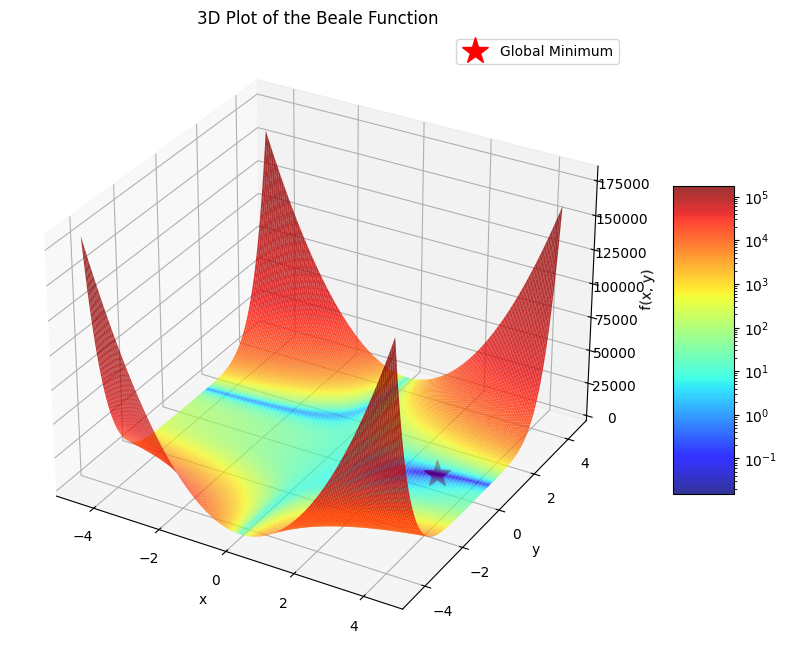

Showing 2D Contour Plot...


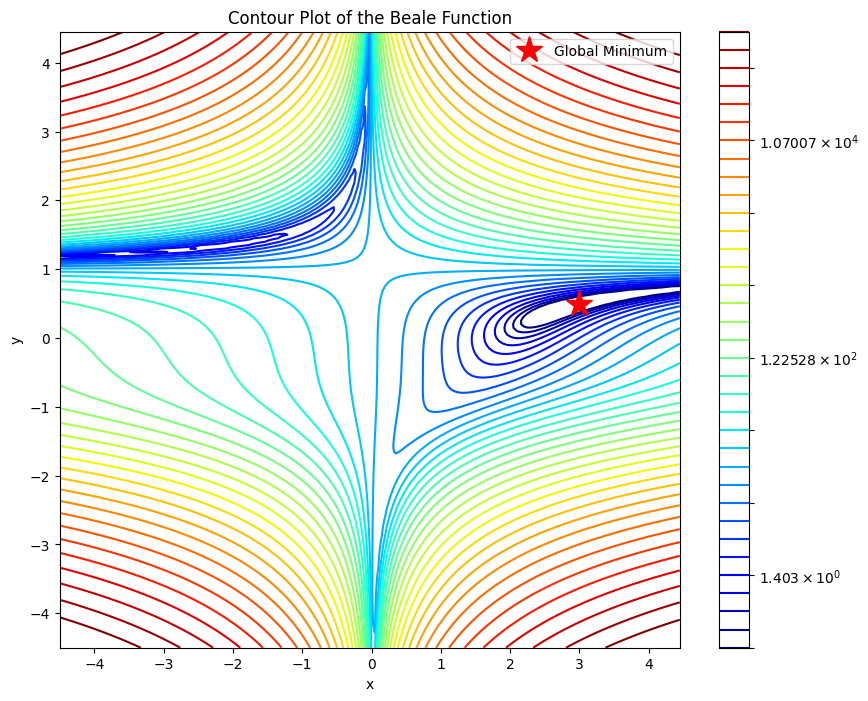

In [ ]:
# The global minimum of the Beale function is known to be at (3, 0.5)
minima_coords = np.array([min_x, min_y])
minima_value = beale_f(min_x, min_y)

minima = np.array([min_x, min_y])
beale_res = beale_f(*minima)
grads_res = beale_grads(*minima)
print(f"minima (1x2 row vector shape): {minima}")
print(f"beale_f output: {beale_res}")
print(f"beale_grad output: {grads_res}")

# --- Plotting ---

# 1. Define Grid for plotting
x_range = np.arange(-4.5, 4.5, 0.05)
y_range = np.arange(-4.5, 4.5, 0.05)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# 2. Calculate Z values (function values) on the grid
z = beale_f(x_mesh, y_mesh)

# Prevent log(0) issues by clipping or adding a small epsilon
z = np.clip(z, 1e-6, None) # Clip values below a small positive number

# 3. Create 3D Plot
fig_3d = plt.figure(figsize=(12, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')

# Plot the surface using the specified parameters
surf = ax_3d.plot_surface(x_mesh, y_mesh, z, norm=LogNorm(), rstride=1, cstride=1,
                          edgecolor='none', alpha=.8, cmap=plt.cm.jet)

# Plot the global minimum point using the specified parameters
# Use min_x, min_y, minima_value for plotting coordinates
ax_3d.plot([min_x], [min_y], [minima_value], 'r*', markersize=20, label='Global Minimum')

ax_3d.set_xlabel('x')
ax_3d.set_ylabel('y')
ax_3d.set_zlabel('f(x, y)')
ax_3d.set_title('3D Plot of the Beale Function')
ax_3d.legend()
fig_3d.colorbar(surf, shrink=0.5, aspect=5) # Add a color bar corresponding to the surface
print("Showing 3D Plot...")
plt.show()


# 4. Create 2D Contour Plot
fig_2d, ax_2d = plt.subplots(figsize=(10, 8))

# Plot the contours using the specified parameters
# Define levels for contour plot - logspace is good for functions with large variations
levels = np.logspace(-0.5, 5, 35)
contour = ax_2d.contour(x_mesh, y_mesh, z, levels=levels, norm=LogNorm(), cmap=plt.cm.jet)

# Plot the global minimum point using the specified parameters
# Use min_x, min_y for plotting coordinates
ax_2d.plot(min_x, min_y, 'r*', markersize=20, label='Global Minimum')

ax_2d.set_xlabel('x')
ax_2d.set_ylabel('y')
ax_2d.set_title('Contour Plot of the Beale Function')
ax_2d.legend()
fig_2d.colorbar(contour) # Add a color bar corresponding to the contour levels
print("Showing 2D Contour Plot...")
plt.show()

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2 - Building an Optimizer - Adam
---
In this task, you are going to implement the Adam optimizer. We are giving the skeleton of the code and the description of the methods, and you need to implement the optimizer.

Recall the Adam update rule:
$$ m_{k+1} = \beta_1 m_k + (1-\beta_1)\nabla f(w^k) = \beta_1 m_k + (1-\beta_1)g_k $$  $$ v_{k+1} = \beta_2 v_k + (1-\beta_2)(\nabla f(w^k))^2 = \beta_2 v_k + (1-\beta_2)g^2_k $$ Then, they use an **unbiased** estimation: $$ \hat{m}_{k+1} = \frac{m_{k+1}}{1 -\beta_1^{k+1}} $$ $$ \hat{v}_{k+1} = \frac{v_{k+1}}{1 -\beta_2^{k+1}} $$ (the $\beta$'s are taken with the power of the current iteration) $$ w_{k+1} = w_k -\frac{\alpha}{\sqrt{\hat{v}_{k+1}} +\epsilon}\hat{m}_{k+1} $$

* $\epsilon$ deafult's is $10^{-8}$


1. Implement `class AdamOptimizer()`.
    * `function` is the Python function you want to optimize.
    * `gradients` is the Python function that returns the gradients of `function`.
    * `x_init` and `y_init` are the initialization points for the optimizer.
    * Save the `path` of the optimizer (the minima points the optimizer visits during the optimization).
    * Stopping criterion: change in minima `<1e-7`.
    * **You can change the class however you wish, you can remove/add variables and methods as you wish**
2. For ` x_init=0.7, y_init=1.4, learning_rate=0.1, beta1=0.9, beta2=0.999`, optimize the Beale function. Plot the results **with the path taken** (better do it on the 2D contour plot).
3. Choose different initialization and learning rate and show the results as in 2.

In [ ]:
class AdamOptimizer():
    def __init__(self, function, gradients, x_init=None, y_init=None,
                 learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.f = function
        self.g = gradients
        scale = 3.0
        self.current_val = np.zeros([2], dtype=float)
        if x_init is not None:
            self.current_val[0] =  float(x_init)
        else:
            self.current_val[0] = np.random.uniform(low=-scale, high=scale)
        if y_init is not None:
            self.current_val[1] = float(y_init)
        else:
            self.current_val[1] = np.random.uniform(low=-scale, high=scale)
        print("x_init: {:.3f}".format(self.current_val[0]))
        print("y_init: {:.3f}".format(self.current_val[1]))

        self.lr = learning_rate
        self.grads_first_moment = np.zeros([2], dtype=float)
        self.grads_second_moment = np.zeros([2], dtype=float)
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon

        # for accumulation of loss and path (w, b)
        self.z_history = []
        self.x_history = []
        self.y_history = []
        self.path = []
        initial_z = self.f(self.current_val[0], self.current_val[1])
        self.history_update(initial_z, self.current_val[0], self.current_val[1])

    def func(self, variables):
        """Beale function.

        Args:
          variables: input data, shape: 1-rank Tensor (vector) np.array
            x: x-dimension of inputs
            y: y-dimension of inputs

        Returns:
          z: Beale function value at (x, y)
        """
        x, y = variables
        return self.f(x, y)

    def gradients(self, variables):
        """Gradient of Beale function.

        Args:
          variables: input data, shape: 1-rank Tensor (vector) np.array
            x: x-dimension of inputs
            y: y-dimension of inputs

        Returns:
          grads: [dx, dy], shape: 1-rank Tensor (vector) np.array
            dx: gradient of Beale function with respect to x-dimension of inputs
            dy: gradient of Beale function with respect to y-dimension of inputs
        """
        x, y = variables
        return self.g(x, y)


    def weights_update(self, grads, time):
        """Weights update using Adam.

          g1 = beta1 * g1 + (1 - beta1) * grads
          g2 = beta2 * g2 + (1 - beta2) * grads ** 2
          g1_unbiased = g1 / (1 - beta1**time)
          g2_unbiased = g2 / (1 - beta2**time)
          w = w - lr * g1_unbiased / (sqrt(g2_unbiased) + epsilon)
        """
        # Update biased first moment estimate
        self.grads_first_moment = self.beta1 * self.grads_first_moment + (1 - self.beta1) * grads
        # Update biased second raw moment estimate
        self.grads_second_moment = self.beta2 * self.grads_second_moment + (1 - self.beta2) * (grads**2)

        # Compute bias-corrected first moment estimate
        # Add a small value to prevent division by zero if time is large and beta1 is close to 1
        m_hat = self.grads_first_moment / (1 - self.beta1**time + 1e-15)
        # Compute bias-corrected second raw moment estimate
        v_hat = self.grads_second_moment / (1 - self.beta2**time + 1e-15)

        # Update parameters
        self.current_val -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

    def history_update(self, z, x, y):
        """Accumulate all interesting variables
        """
        self.z_history.append(z)

        self.path.append([x, y]) # Store as list of [x, y] pairs


    def train(self, max_steps):
        time = 0
        tolerance = 1e-7 # Stopping criterion

        for step in range(max_steps):
            time += 1 # Adam time step starts from 1 for bias correction
            prev_val = self.current_val.copy()
            current_x, current_y = prev_val[0], prev_val[1]

            # Calculate function value and gradients at the current point
            grads = self.g(current_x, current_y)

            # Update weights using Adam logic
            self.weights_update(grads, time)

            # Get the state *after* the update for history
            current_z_after_update = self.f(self.current_val[0], self.current_val[1])
            # Store the state *after* the update
            self.history_update(current_z_after_update, self.current_val[0], self.current_val[1])

            # Check stopping criterion: change in parameters
            change = np.linalg.norm(self.current_val - prev_val)
            if change < tolerance:
                print(f"Converged at step {step+1} due to tolerance.")
                break

        # Convert path to numpy array for easier plotting
        self.path = np.array(self.path)
        if 'step' not in locals() or step == max_steps - 1:
          if max_steps > 0: # Avoid printing if max_steps was 0
            print(f"Reached max_steps ({max_steps}) without converging based on tolerance {tolerance}.")

In [ ]:
opt = AdamOptimizer(beale_f, beale_grads, x_init=0.7, y_init=1.4, learning_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8)

x_init: 0.700
y_init: 1.400


In [ ]:
%time
opt.train(1000)
print("Global minima")
print("x*: {:.2f}  y*: {:.2f}".format(minima[0], minima[1]))
print("Solution using the gradient descent")
print("x: {:.4f}  y: {:.4f}".format(opt.current_val[0], opt.current_val[1]))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.78 µs
Converged at step 725 due to tolerance.
Global minima
x*: 3.00  y*: 0.50
Solution using the gradient descent
x: 3.0000  y: 0.5000


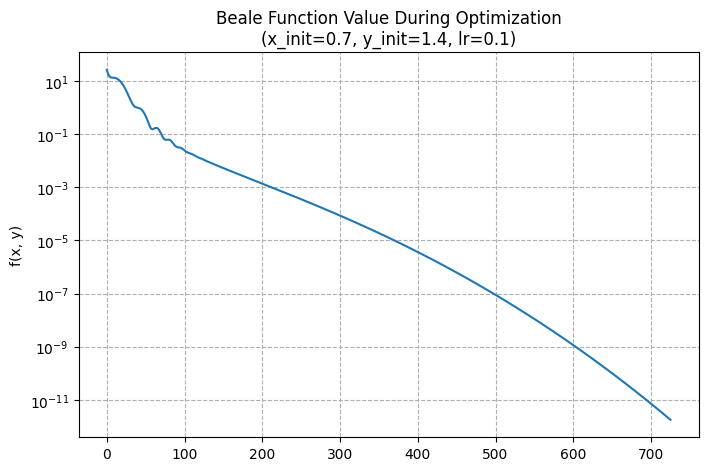

In [ ]:
# plot the Beale function values during the optimization
plt.figure(figsize=(8, 5))
plt.plot(opt.z_history)
plt.title(f'Beale Function Value During Optimization\n(x_init={opt.path[0, 0]:.1f}, y_init={opt.path[0, 1]:.1f}, lr={opt.lr})')
plt.ylabel('f(x, y)')
plt.yscale('log') # Often helpful to see convergence on log scale
plt.grid(True, which="both", ls="--")
plt.show()


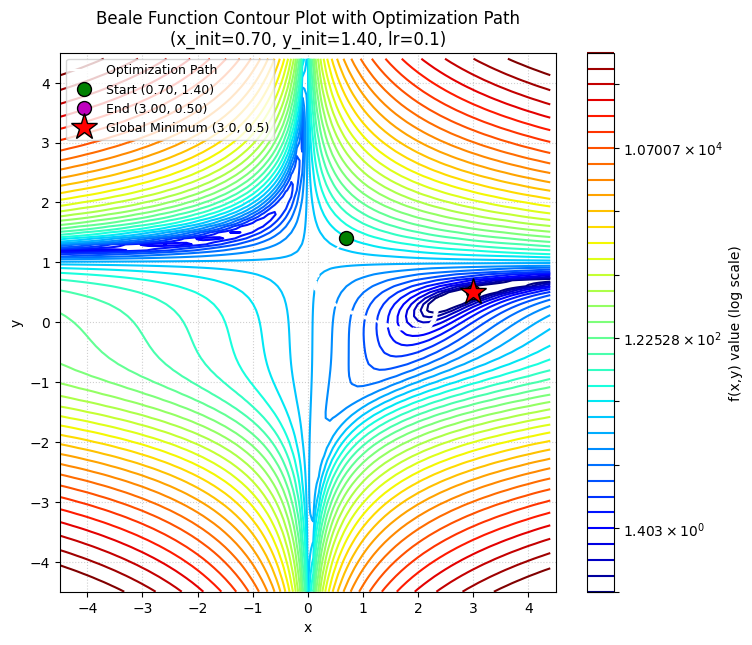

In [ ]:
x_plot_task2 = np.arange(-4.5, 4.5, 0.1)
y_plot_task2 = np.arange(-4.5, 4.5, 0.1)
x_mesh_task2, y_mesh_task2 = np.meshgrid(x_plot_task2, y_plot_task2)
z_mesh_task2 = beale_f(x_mesh_task2, y_mesh_task2)
# Clip for LogNorm if plotting with it
z_mesh_clipped = np.clip(z_mesh_task2, 1e-6, None)

# Get the path from the optimizer
path = opt.path # path should be a Nx2 numpy array after train finishes

fig_contour, ax_contour = plt.subplots(figsize=(8, 7)) # Adjust figure size if needed

# Plot Contours (using LogNorm as in Task 1 is good)
levels = np.logspace(-.5, 5, 35)
contour = ax_contour.contour(x_mesh_task2, y_mesh_task2, z_mesh_clipped,
                             levels=levels, norm=LogNorm(), cmap=plt.cm.jet)

# Plot the optimization path
if len(path) > 0:
    # Plot line connecting points
    ax_contour.plot(path[:, 0], path[:, 1], 'w.-', markersize=4, linewidth=1.5, # White line with dots
                    label='Optimization Path', zorder=10) # Use zorder to keep path visible
    # Highlight Start and End points
    ax_contour.plot(path[0, 0], path[0, 1], 'go', markersize=10, # Green circle for start
                    label=f'Start ({path[0, 0]:.2f}, {path[0, 1]:.2f})', zorder=11, markeredgecolor='k')
    ax_contour.plot(path[-1, 0], path[-1, 1], 'mo', markersize=10, # Magenta circle for end
                    label=f'End ({path[-1, 0]:.2f}, {path[-1, 1]:.2f})', zorder=12, markeredgecolor='k')

# Plot the known global minimum
ax_contour.plot(min_x, min_y, 'r*', markersize=20, # Red star
                label=f'Global Minimum ({min_x:.1f}, {min_y:.1f})', zorder=13, markeredgecolor='k')

# Labels, Title, Legend, Colorbar
ax_contour.set_xlabel('x')
ax_contour.set_ylabel('y')
# Make sure title uses correct initial points from path
ax_contour.set_title(f'Beale Function Contour Plot with Optimization Path\n'
                     f'(x_init={path[0, 0]:.2f}, y_init={path[0, 1]:.2f}, lr={opt.lr})')
ax_contour.legend(loc='upper left', fontsize=9)
fig_contour.colorbar(contour, ax=ax_contour, label='f(x,y) value (log scale)')
ax_contour.set_xlim(-4.5, 4.5)
ax_contour.set_ylim(-4.5, 4.5)
ax_contour.grid(True, linestyle=':', alpha=0.6)
plt.show()


### Task 2 - Part 3: Adam with Different Initializations and Learning Rates



--- Adam Optimization: Variation 1 ---
Target Initial params: [-1.5, 1.5], LR: 0.01
x_init: -1.500
y_init: 1.500
Reached max_steps (2000) without converging based on tolerance 1e-07.


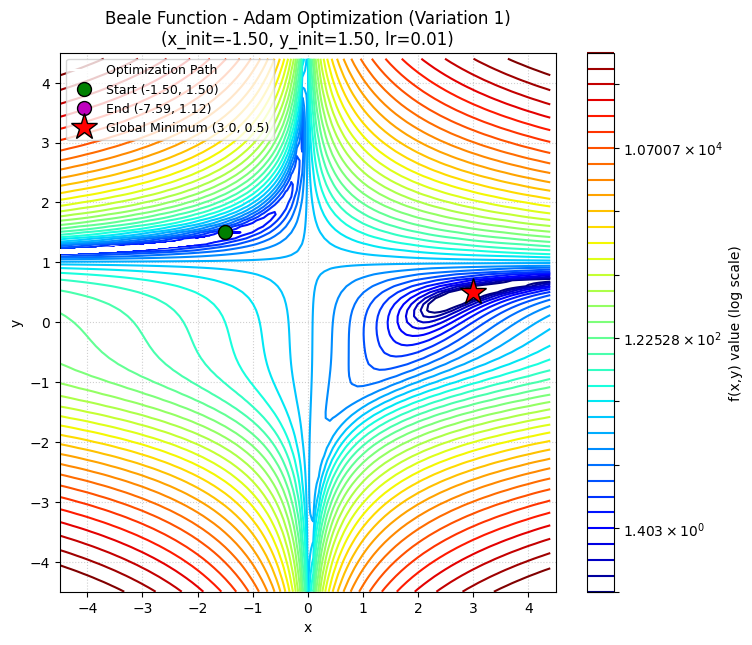

Adam (Variation 1) - Final parameters: [-7.59417105  1.11746062], Final function value: 0.642750


In [ ]:
print("\n--- Adam Optimization: Variation 1 ---")
# Initial parameters and learning rate for this variation
init_x_v1 = -1.5
init_y_v1 = 1.5
lr_v1 = 0.01
num_iterations_v1 = 2000  # Max steps for the train method

print(f"Target Initial params: [{init_x_v1}, {init_y_v1}], LR: {lr_v1}")

# Instantiate the optimizer
optimizer_v1 = AdamOptimizer(function=beale_f,
                             gradients=beale_grads,
                             x_init=init_x_v1,
                             y_init=init_y_v1,
                             learning_rate=lr_v1,
                             beta1=0.9,
                             beta2=0.999,
                             epsilon=1e-8)

# Train the optimizer
optimizer_v1.train(max_steps=num_iterations_v1)

# Define the mesh for plotting specifically for this plot
x_plot_task2_v1 = np.arange(-4.5, 4.5, 0.1)
y_plot_task2_v1 = np.arange(-4.5, 4.5, 0.1)
x_mesh_task2_v1, y_mesh_task2_v1 = np.meshgrid(x_plot_task2_v1, y_plot_task2_v1)
z_mesh_task2_v1 = beale_f(x_mesh_task2_v1, y_mesh_task2_v1)
# Clip for LogNorm if plotting with it
z_mesh_clipped_v1 = np.clip(z_mesh_task2_v1, 1e-6, None)

# Get the path from the optimizer for this variation
path_v1 = np.array(optimizer_v1.path)

fig_contour_v1, ax_contour_v1 = plt.subplots(figsize=(8, 7))

# Plot Contours
levels_v1 = np.logspace(-.5, 5, 35)
contour_v1 = ax_contour_v1.contour(x_mesh_task2_v1, y_mesh_task2_v1, z_mesh_clipped_v1,
                                   levels=levels_v1, norm=LogNorm(), cmap=plt.cm.jet)

# Plot the optimization path
if len(path_v1) > 0:
    ax_contour_v1.plot(path_v1[:, 0], path_v1[:, 1], 'w.-', markersize=4, linewidth=1.5,
                       label='Optimization Path', zorder=10)
    ax_contour_v1.plot(path_v1[0, 0], path_v1[0, 1], 'go', markersize=10,
                       label=f'Start ({path_v1[0, 0]:.2f}, {path_v1[0, 1]:.2f})', zorder=11, markeredgecolor='k')
    ax_contour_v1.plot(path_v1[-1, 0], path_v1[-1, 1], 'mo', markersize=10,
                       label=f'End ({path_v1[-1, 0]:.2f}, {path_v1[-1, 1]:.2f})', zorder=12, markeredgecolor='k')

# Plot the known global minimum
ax_contour_v1.plot(min_x, min_y, 'r*', markersize=20,
                   label=f'Global Minimum ({min_x:.1f}, {min_y:.1f})', zorder=13, markeredgecolor='k')

# Labels, Title, Legend, Colorbar
ax_contour_v1.set_xlabel('x')
ax_contour_v1.set_ylabel('y')
if len(path_v1) > 0:  # Check if path exists to avoid error on path[0,0]
    ax_contour_v1.set_title(f'Beale Function - Adam Optimization (Variation 1)\n'
                            f'(x_init={path_v1[0, 0]:.2f}, y_init={path_v1[0, 1]:.2f}, lr={optimizer_v1.lr})')
else:
    ax_contour_v1.set_title(f'Beale Function - Adam Optimization (Variation 1)\n (No path data)')

ax_contour_v1.legend(loc='upper left', fontsize=9)
fig_contour_v1.colorbar(contour_v1, ax=ax_contour_v1, label='f(x,y) value (log scale)')
ax_contour_v1.set_xlim(-4.5, 4.5)
ax_contour_v1.set_ylim(-4.5, 4.5)
ax_contour_v1.grid(True, linestyle=':', alpha=0.6)
plt.show()


final_params_v1 = optimizer_v1.current_val
final_f_val_v1 = optimizer_v1.z_history[-1]  # Last recorded function value
print(f"Adam (Variation 1) - Final parameters: {final_params_v1}, Final function value: {final_f_val_v1:.6f}")

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3 - PyTorch Autograd
---
For the function from the theory practice: $$ f = \exp(\exp(x) + \exp(x)^2) +\sin(\exp(x) + \exp(x)^2)  $$

1. Implement it and its dervative (explicitly) using `torch`.
2. Define a scalar tensor `x` and use `autograd` to calculate the derivative w.r.t $x$. Does the result correspond to the output of the function the calculates the derivative explicitly?

In [ ]:
def f(x):
    f_val = None
    # Implement the function f using torch operations
    exp_x = torch.exp(x)
    exp_x_sq = exp_x**2
    inner_term = exp_x + exp_x_sq
    f_val = torch.exp(inner_term) + torch.sin(inner_term)
    return f_val

def derv_f(x):
    derv_val = None
    # Implement the explicitly derived derivative using torch operations
    # From Q4: df/dx = (exp(c) + cos(c)) * (1 + 2*exp(x)) * exp(x)
    # where c = exp(x) + exp(x)^2
    exp_x = torch.exp(x)
    exp_x_sq = exp_x**2
    c = exp_x + exp_x_sq
    derv_val = (torch.exp(c) + torch.cos(c)) * (1 + 2 * exp_x) * exp_x
    return derv_val

In [ ]:
x = torch.tensor(0.5, requires_grad=True)
print(x)
f_res = f(x)
f_manual_grad = derv_f(x.detach())

# Calculate with torch autograd
# Ensure any previous gradients are cleared (good practice)
if x.grad is not None:
    x.grad.zero_()

# Compute gradients by backpropagating from the result of f(x)
f_res.backward()

# Access the gradient computed by autograd
f_autograd = x.grad


print(f_manual_grad)
print(f_autograd)

tensor(0.5000, requires_grad=True)
tensor(555.9719)
tensor(555.9719)


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 4 - Low Rank Matrix Factorization
---
Consider the following optimization problem: $$ \min_{\hat{U}, \hat{V}}||A - \hat{U}\hat{V}||_F^{2} $$ Where $A \in \mathcal{R}^{m \times n},\hat{U} \in \mathcal{R}^{m \times r}, \hat{V} \in \mathcal{R}^{r \times n} $ and $r < min(m,n)$ ($r$ is the rank of the matrix). $||\cdot||_F^2$ denotes the Frobenius norm.

1. Implement a function, `gd_factorize_ad(A, rank, num_epochs=1000, lr=0.01)`, that given a 2D tensor `A` and a `rank`, will calculate the low-rank factorization of `A` using **gradient decsent**. Compute and apply all the gradients of $\hat{U}$ and of $\hat{V}$ once per epoch. $\hat{U}$ and $\hat{V}$ should be initially created with uniform random values. Use PyTorch's `autograd` for the gradients.
    * To compute the squared Frobenius norm loss (reconstruction loss), use `torch.nn.functional.mse loss with reduction=’sum’`.

2. Use the provided `data` of the Iris dataset of 150 instances and 4 features. Apply `gd_factorize_ad` to compute the 2-rank matrix factorization of `data`. What is the reconstruction loss?

In [ ]:
import torch.nn.functional as F
df = load_iris(as_frame=True).data # option 1
# df = pd.read_csv('./iris.data', header=None) # option 2
data = torch.tensor(df.iloc[:, [0, 1, 2, 3]].values)
data = data - data.mean(dim=0)

In [ ]:
def gd_factorize_ad(A, rank, num_epochs=1000, lr=0.01):
    # initialize
    U = None
    V = None

    m, n = A.shape
    # Initialize U and V with uniform random values between 0 and 1
    # and require gradients for optimization. Match dtype with input A.
    U = torch.rand((m, rank), requires_grad=True, dtype=A.dtype)
    V = torch.rand((rank, n), requires_grad=True, dtype=A.dtype)

    # implement gradient descent
    for epoch in range(num_epochs):

        # 1. Forward pass: Reconstruct A
        A_hat = U @ V

        # 2. Calculate loss (Squared Frobenius Norm using mse_loss with sum reduction)
        loss = F.mse_loss(A_hat, A, reduction='sum')

        # 3. Backward pass: Compute gradients w.r.t. U and V
        # Zero previous gradients before calculating new ones
        if U.grad is not None:
            U.grad.zero_()
        if V.grad is not None:
            V.grad.zero_()

        loss.backward()

        # 4. Gradient Descent Update Step
        # Update U and V using their gradients
        # Use torch.no_grad() to prevent these updates from being tracked
        with torch.no_grad():
            U -= lr * U.grad
            V -= lr * V.grad

        if epoch % 5 == 0:
            print(f'epoch: {epoch}, loss: {loss.item()}')
    return U, V

In [ ]:
U, V = gd_factorize_ad(data.float(), rank=2, num_epochs=1000, lr=0.01)

epoch: 0, loss: 888.7950439453125
epoch: 5, loss: 531.0762939453125
epoch: 10, loss: 72.64852905273438
epoch: 15, loss: 51.54425811767578
epoch: 20, loss: 51.36109924316406
epoch: 25, loss: 51.35871124267578
epoch: 30, loss: 51.358497619628906
epoch: 35, loss: 51.358375549316406
epoch: 40, loss: 51.35826110839844
epoch: 45, loss: 51.35813522338867
epoch: 50, loss: 51.358009338378906
epoch: 55, loss: 51.35786437988281
epoch: 60, loss: 51.35770797729492
epoch: 65, loss: 51.35755157470703
epoch: 70, loss: 51.35737609863281
epoch: 75, loss: 51.35718536376953
epoch: 80, loss: 51.35697555541992
epoch: 85, loss: 51.356754302978516
epoch: 90, loss: 51.35651779174805
epoch: 95, loss: 51.356258392333984
epoch: 100, loss: 51.35597229003906
epoch: 105, loss: 51.35566329956055
epoch: 110, loss: 51.35532760620117
epoch: 115, loss: 51.35496520996094
epoch: 120, loss: 51.35456466674805
epoch: 125, loss: 51.3541259765625
epoch: 130, loss: 51.3536491394043
epoch: 135, loss: 51.35313034057617
epoch: 140,

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/